In [1]:
import os
import sys
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def load_data(path):
    result_df = pd.DataFrame()
    for name in os.listdir(path):

        with open(fr'{path}\{name}', 'r') as result_f:
            result_dict = json.load(result_f)
        temp_result_df = get_dfs_from_dict(result_dict)
        result_df = pd.concat([result_df, temp_result_df], axis=0)
    return result_df

def get_dfs_from_dict(dict):
    result_df = pd.DataFrame()

    for key in dict.keys():
        if 'Alpha' not in key:
            continue
        temp_input_df = pd.DataFrame.from_dict(dict[key]['input'], orient='index').T
        temp_individual_results_df = pd.DataFrame.from_dict(dict[key]['individual_results'])
        #temp_average_df = pd.DataFrame.from_dict(dict[key]['averages'], orient='index').T
        #temp_result_df = pd.concat([temp_input_df, temp_average_df], axis=1)
        temp_result_df = temp_input_df

        temp_result_df = temp_result_df.merge(temp_individual_results_df, how='cross')
        result_df = pd.concat([result_df, temp_result_df], axis=0)
        return result_df


In [3]:
diff_df = load_data('results\\different_companies')
competing_df = load_data('results\\competing_companies')

In [4]:
diff_df['avg_payment_per_evaluation_score'] = diff_df['avg_payment_per_token'] / diff_df['llm_evaluation_score']
competing_df['avg_payment_per_evaluation_score'] = competing_df['avg_payment_per_token'] / competing_df['llm_evaluation_score']

# Normal checks
- same bid for both bidders (3.0)
- budget >= 12

In [5]:
normal_diff_df = diff_df[(diff_df['bid'] == 3.0) & (diff_df['budget'] >= 12)]
normal_competing_df = competing_df[(competing_df['bid'] == 3.0) & (competing_df['budget'] >= 12)]

### Value per strategy

llm evaluation score


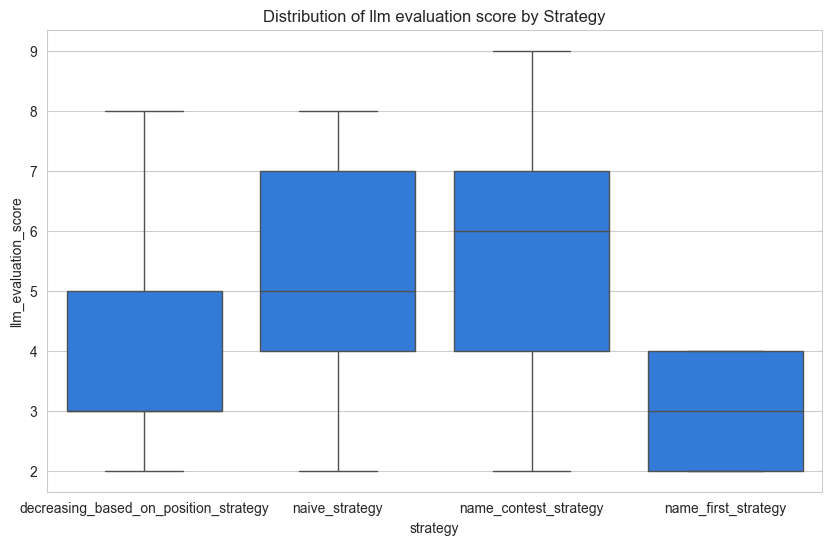

In [49]:
facebook_blue = "#1877F2"
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='llm_evaluation_score', data=normal_diff_df, color=facebook_blue)
plt.title('Distribution of llm evaluation score by Strategy')
#plt.savefig('payment_distribution.png')
plt.show()

name appeared score


<Figure size 1000x600 with 0 Axes>

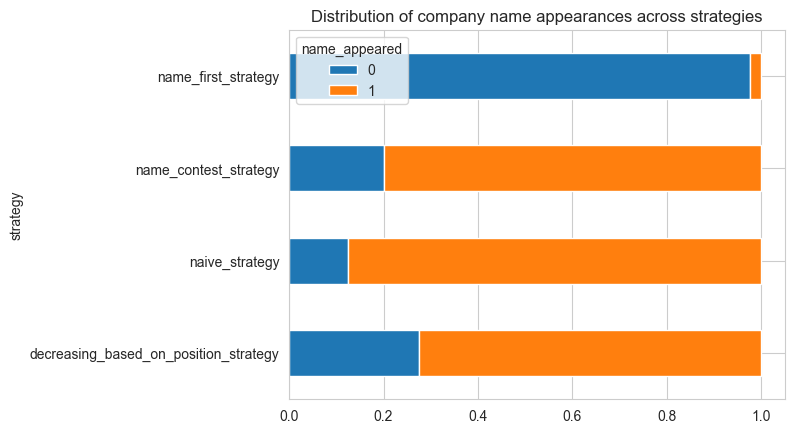

In [68]:
plt.figure(figsize=(10, 6))
props = normal_diff_df.groupby('strategy')['name_appeared'].value_counts(normalize=True).unstack()
props.plot(kind='barh', stacked=True)
plt.title('Distribution of company name appearances across strategies')
plt.show()

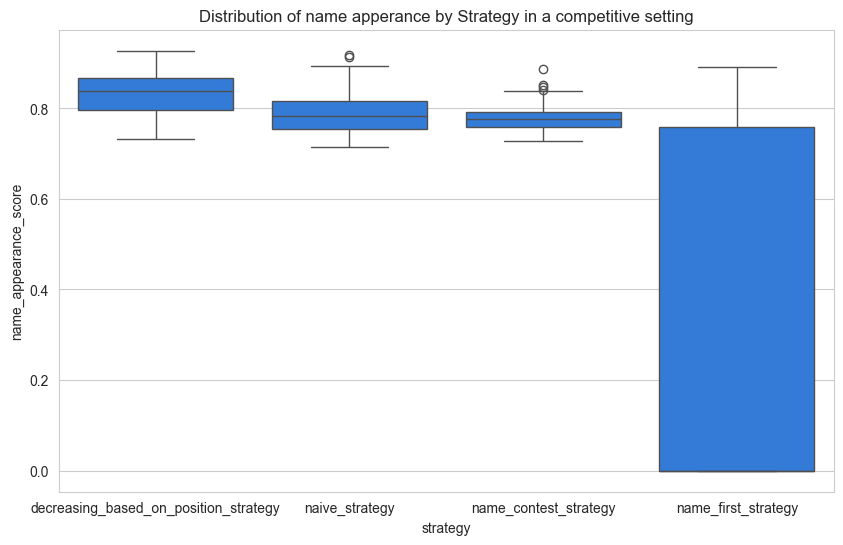

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='name_appearance_score', data=normal_competing_df, color=facebook_blue)
plt.title('Distribution of name apperance by Strategy in a competitive setting')
plt.show()

The main things we can observe are:
- Naive and name contest have the same ranges but name_contest's median is higher and its max value
- Name First gives barely gives any value, and only has 1 occurrence of making the name appear.
- decreasing_based_on_position is apparently the best strategy to show the name in the competing setting

### Money per strategy

payment per token

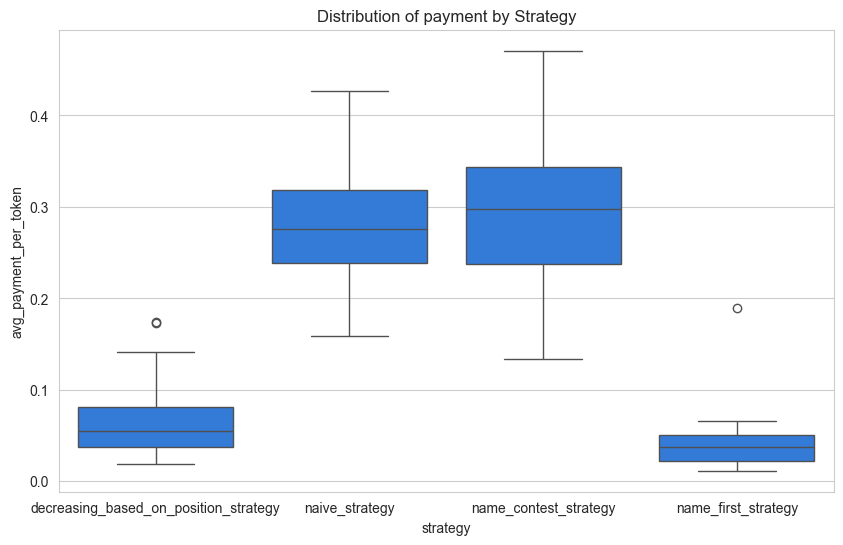

In [52]:
sns.set_style("whitegrid")
# 1. Boxplot: Distribution of payment by strategy
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='avg_payment_per_token', data=normal_diff_df, color=facebook_blue)
plt.title('Distribution of payment by Strategy')
#plt.savefig('payment_distribution.png')
plt.show()

The main things we can observe are:
- Name contest usually requires a higher price
- Name First and decreasing based on position require a low price
- Same results as competing

### Value for money per strategy

payment_per_token / evaluation-score

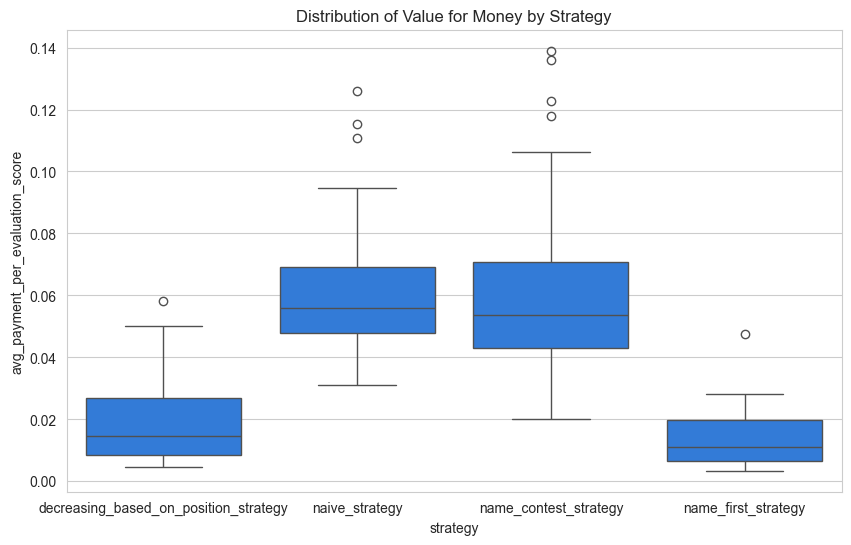

In [53]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='avg_payment_per_evaluation_score', data=normal_diff_df, color=facebook_blue)
plt.title('Distribution of Value for Money by Strategy')
plt.show()

avg_token_payment_prob_ratio

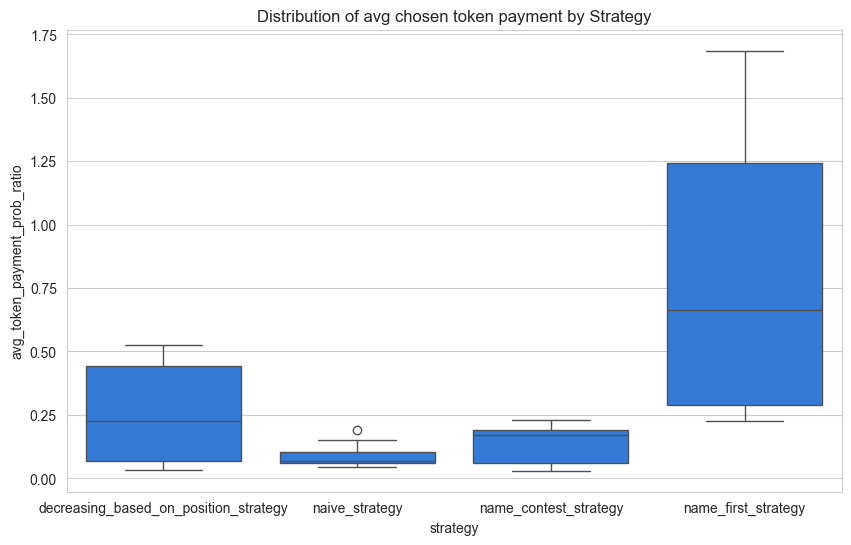

In [69]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='avg_token_payment_prob_ratio', data=normal_diff_df, color=facebook_blue)
plt.title('Distribution of avg chosen token payment by Strategy')
plt.show()

# Same bid, Low budget

In [55]:
low_budget_diff_df = diff_df[(diff_df['bid'] == 3.0) & (diff_df['budget'] == 8)]
low_budget_competing_df = competing_df[(competing_df['bid'] == 3.0) & (competing_df['budget'] == 8)]

llm evaluation score


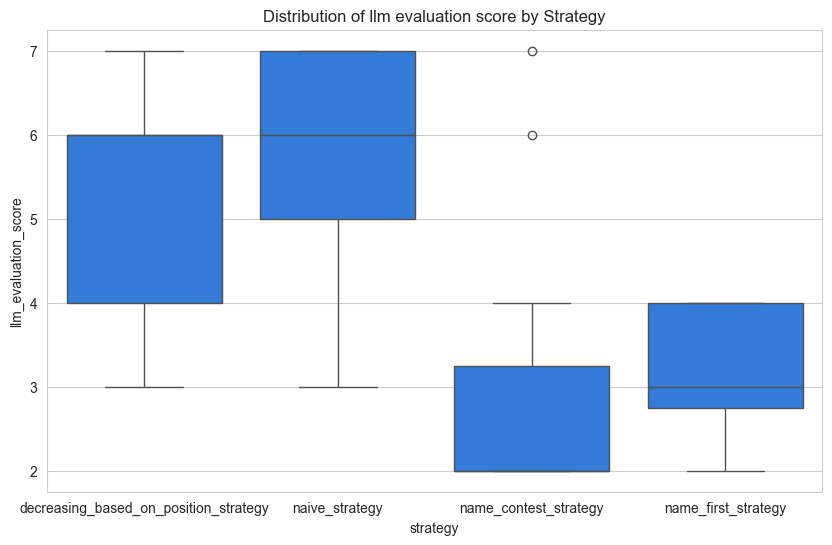

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='llm_evaluation_score', data=low_budget_diff_df, color=facebook_blue)
plt.title('Distribution of llm evaluation score by Strategy')
plt.show()

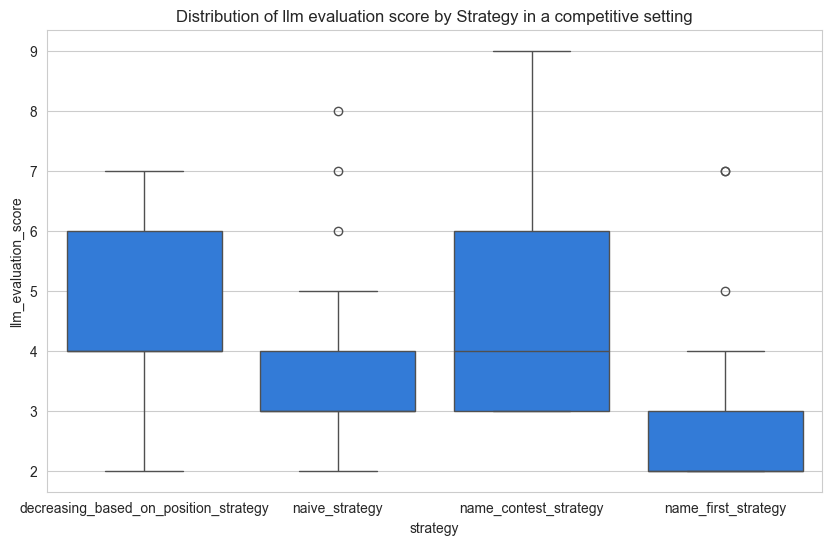

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='llm_evaluation_score', data=low_budget_competing_df, color=facebook_blue)
plt.title('Distribution of llm evaluation score by Strategy in a competitive setting')
plt.show()

name appeared score


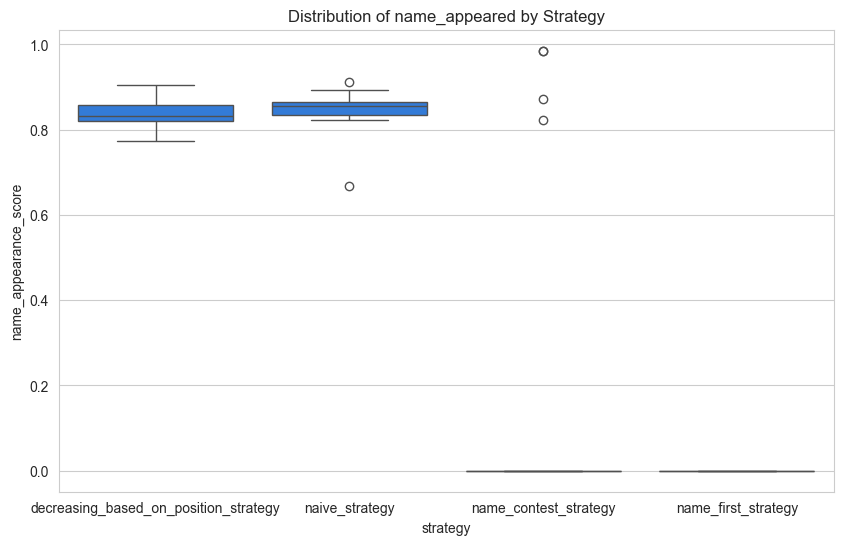

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='name_appearance_score', data=low_budget_diff_df, color=facebook_blue)
plt.title('Distribution of name_appeared by Strategy')
plt.show()

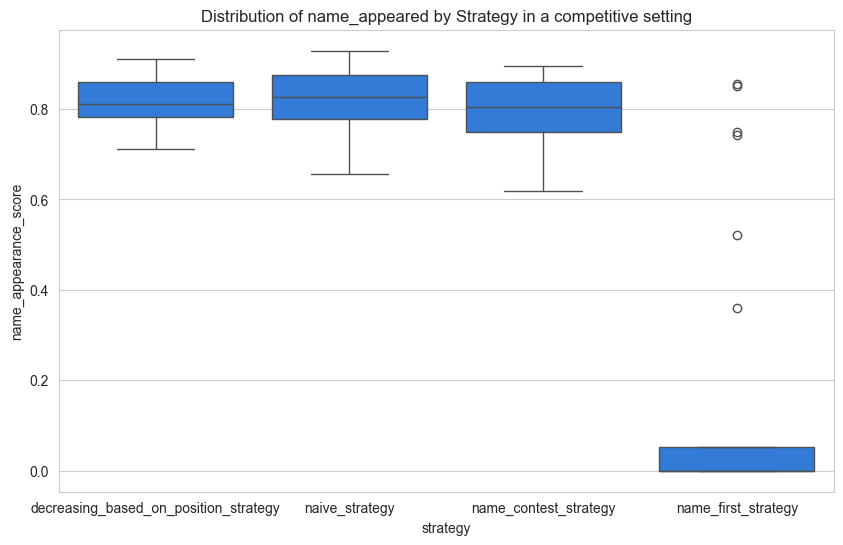

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='name_appearance_score', data=low_budget_competing_df, color=facebook_blue)
plt.title('Distribution of name_appeared by Strategy in a competitive setting')
plt.show()

The main things we can observe are:
 - We see a difference between competing companies and different companies, while naive strategy gives the most value in different companies, name contest give more value in competing companies, this might indicate that name is more important in competing strategies
  - Name contest gives a better result in a competing setting

# bid comparison, budget>=12

In [18]:
all_bid_diff_df = diff_df[diff_df['budget'] >= 12]
all_bid_competing_df = competing_df[competing_df['budget'] >= 12]

payment_per_token / evaluation-score

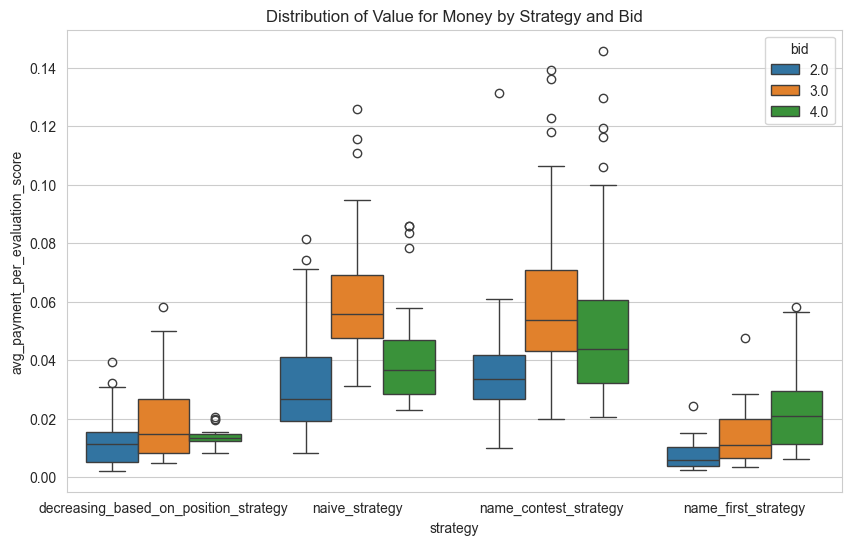

In [65]:
sns.set_style("whitegrid")
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
# 1. Boxplot: Distribution of payment by strategy
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='avg_payment_per_evaluation_score', data=all_bid_diff_df, hue='bid', palette=colors)
plt.title('Distribution of Value for Money by Strategy and Bid')
#plt.savefig('payment_distribution.png')
plt.show()

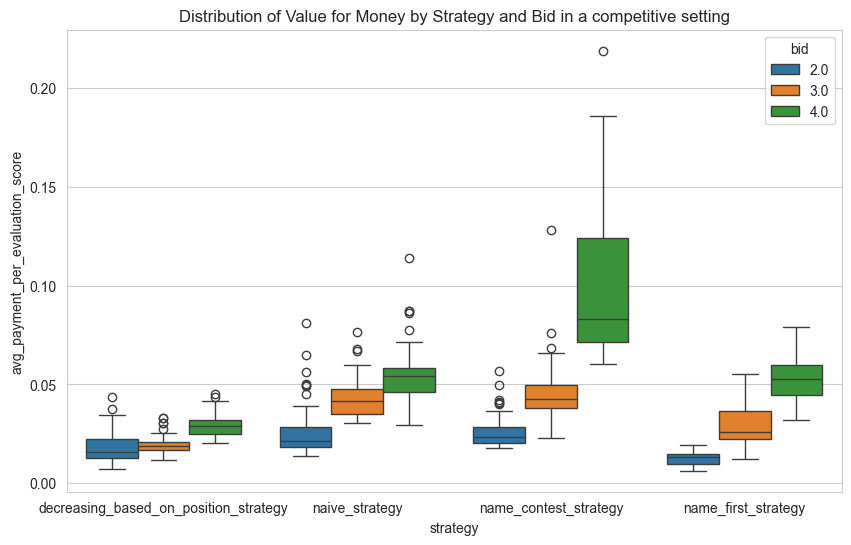

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='avg_payment_per_evaluation_score', data=all_bid_competing_df, hue='bid', palette=colors)
plt.title('Distribution of Value for Money by Strategy and Bid in a competitive setting')
plt.show()

avg_token_payment_prob_ratio

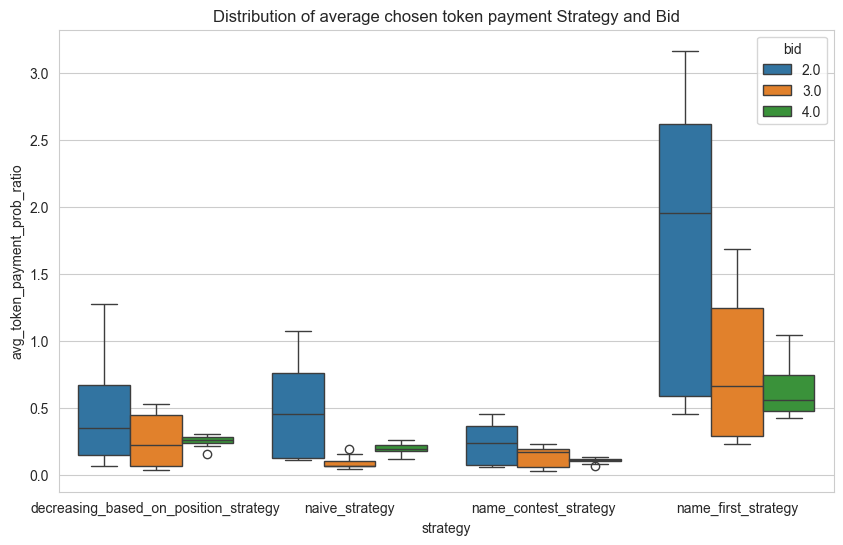

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='strategy', y='avg_token_payment_prob_ratio', data=all_bid_diff_df, hue='bid', palette=colors_corporate)
plt.title('Distribution of average chosen token payment Strategy and Bid')
plt.show()

# Competitor name appeared per strategy

In [78]:
diff_df['competitor_name_appeared'] = diff_df['outcome'].str.contains('Beta Resort')
competing_df['competitor_name_appeared'] = competing_df['outcome'].str.contains('Beta Resort')
normal_diff_df = diff_df[(diff_df['bid'] == 3.0) & (diff_df['budget'] >= 12)]
normal_competing_df = competing_df[(competing_df['bid'] == 3.0) & (competing_df['budget'] >= 12)]

In [79]:
print(f"In different companies, Beta Resort is shown in {(normal_diff_df['competitor_name_appeared'].sum() / normal_diff_df.shape[0]) * 100}%")
print(f"In competing companies, Beta Resort is shown in {(normal_competing_df['competitor_name_appeared'].sum() / normal_competing_df.shape[0]) * 100}%")

In different companies, Beta Resort is shown in 92.10526315789474%
In competing companies, Beta Resort is shown in 29.09090909090909%


<Figure size 1000x600 with 0 Axes>

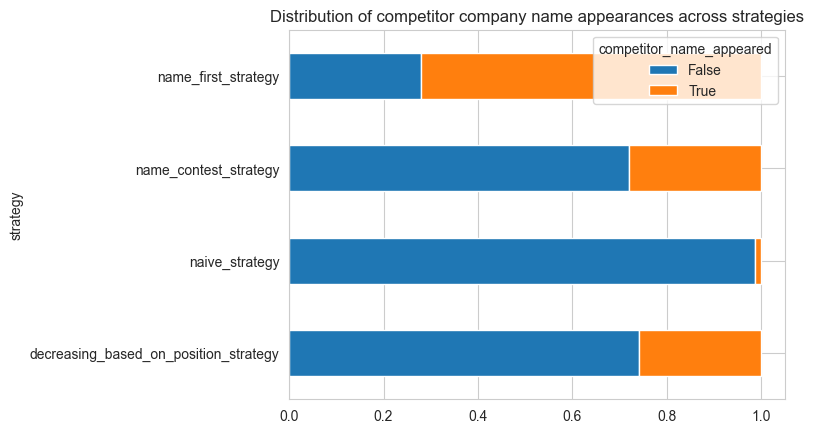

In [83]:
plt.figure(figsize=(10, 6))
props = normal_competing_df.groupby('strategy')['competitor_name_appeared'].value_counts(normalize=True).unstack()
props.plot(kind='barh', stacked=True)
plt.title('Distribution of competitor company name appearances across strategies in a competitve setting')
plt.show()

Things we can observe:
- It's interesting to see that in the different companies, Beta Resort shows in 92% of ads while in competing companies only in 29%
- We see that naive strategy gives us the best result for competitor name appeared

# Evaluation of LLM score

<Figure size 1000x600 with 0 Axes>

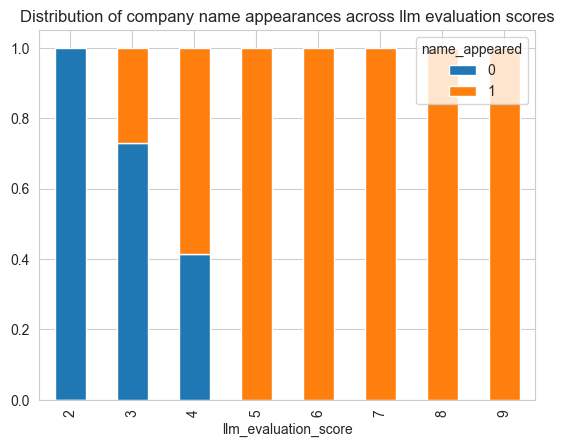

In [39]:
plt.figure(figsize=(10, 6))
props = normal_diff_df.groupby('llm_evaluation_score')['name_appeared'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True)
plt.title('Distribution of company name appearances across llm evaluation scores')
plt.show()

<Figure size 1000x600 with 0 Axes>

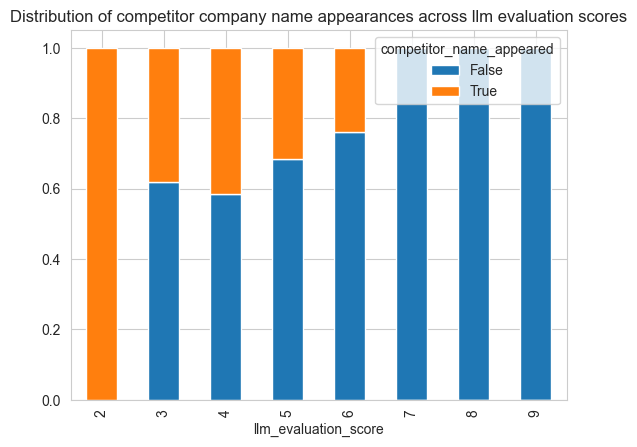

In [40]:
plt.figure(figsize=(10, 6))
props = normal_competing_df.groupby('llm_evaluation_score')['competitor_name_appeared'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True)
plt.title('Distribution of competitor company name appearances across llm evaluation scores in a competitve setting')
plt.show()

<Figure size 1000x600 with 0 Axes>

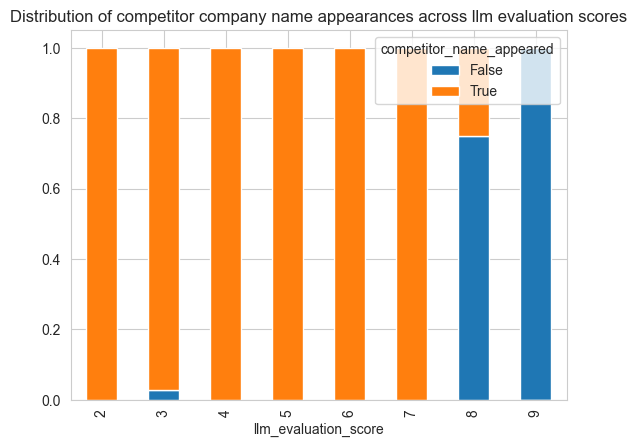

In [41]:
plt.figure(figsize=(10, 6))
props = normal_diff_df.groupby('llm_evaluation_score')['competitor_name_appeared'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True)
plt.title('Distribution of competitor company name appearances across llm evaluation scores')
plt.show()

- We see there is a clear correlation between the llm's score to if the name appeared, which may indicate the score is good
- There is also a clear indication between competitor name appeared in competitive setting
- There is less of a distinction between the llm evaluation score and competitor name in different companies setting
